In [2]:
# 1.1 Generating Your Own Unique Data

In [4]:
%run datasetGenerator.py --ID 1002086719

In [ ]:
# 1.2 Fisher’s Exact Test

In [32]:
import csv
import numpy as np
import pandas as pd
from scipy.stats import fisher_exact
with open("/Users/divya/Desktop/BioAssignment0913/1002086719.csv", 'r') as file:
    reader = csv.reader(file,delimiter='\t')
    header=next(reader)
    odd_ratios=[]
    p_vals=[]
    for row in reader:
        x = row[0]
        #print(x)
        y=x.split(",")
        y=y[1:]
        y=list(map(int, y))
        #print(y)
        z=np.array([y])
        z=np.resize(z,(2,2))
        #print(z)
        oddsr, p = fisher_exact(z, alternative='less')
        odd_ratios.append(oddsr)
        p_vals.append(p)
#print(odd_ratios)
df = pd.read_csv("/Users/divya/Desktop/BioAssignment0913/1002086719.csv")
#print(df)
df["odd_ratios"] = odd_ratios
df["p_values"]=p_vals
df.to_csv("/Users/divya/Desktop/BioAssignment0913/1002086719_2.csv", index=False)
#print(df)

In [33]:
df

,SNP,Case_Num_C_Allele,Case_Num_T_Allele,Control_Num_C_Allele,Control_Num_T_Allele,odd_ratios,p_values
0,snp0,0,50,42,58,0.000000,9.205282e-10
1,snp1,4,46,12,88,0.637681,3.280000e-01
2,snp2,23,27,21,79,3.204586,9.995389e-01
3,snp3,10,40,74,26,0.087838,2.475374e-10
4,snp4,17,33,48,52,0.558081,7.204356e-02
...,...,...,...,...,...,...,...
995,snp995,44,6,6,94,114.888889,1.000000e+00
996,snp996,41,9,39,61,7.125356,9.999999e-01
997,snp997,43,7,40,60,9.214286,1.000000e+00
998,snp998,31,19,29,71,3.994555,9.999755e-01


In [34]:
row1 = df['p_values']
result = pd.DataFrame(row1)

In [35]:
result

,p_values
0,9.205282e-10
1,3.280000e-01
2,9.995389e-01
3,2.475374e-10
4,7.204356e-02
...,...
995,1.000000e+00
996,9.999999e-01
997,1.000000e+00
998,9.999755e-01


In [36]:
result = result.assign(significant= df['p_values']<5e-8)

In [37]:
result

,p_values,significant
0,9.205282e-10,True
1,3.280000e-01,False
2,9.995389e-01,False
3,2.475374e-10,True
4,7.204356e-02,False
...,...,...
995,1.000000e+00,False
996,9.999999e-01,False
997,1.000000e+00,False
998,9.999755e-01,False


In [38]:
result['significant'].value_counts() [True]

166

In [39]:
result.to_csv("/Users/divya/Desktop/BioAssignment0913/result.csv", index=False)

In [40]:
# 1.3 Corrected P-Values

In [41]:
result = result.assign(significant_after_corrected= df['p_values']<5e-11)

In [42]:
result

,p_values,significant,significant_after_corrected
0,9.205282e-10,True,False
1,3.280000e-01,False,False
2,9.995389e-01,False,False
3,2.475374e-10,True,False
4,7.204356e-02,False,False
...,...,...,...
995,1.000000e+00,False,False
996,9.999999e-01,False,False
997,1.000000e+00,False,False
998,9.999755e-01,False,False


In [43]:
result['significant_after_corrected'].value_counts() [True]

119

In [44]:
result.to_csv("/Users/divya/Desktop/BioAssignment0913/result.csv", index=False)

In [45]:
# 1.4 Manhattan Plots

Text(0.5, 0, 'SNP')

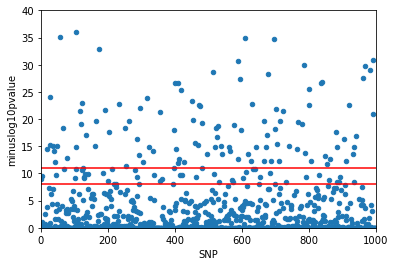

In [46]:
from pandas import DataFrame
from scipy.stats import uniform
from scipy.stats import randint
import numpy as np
import matplotlib.pyplot as plt

# -log_10(pvalue)
df['minuslog10pvalue'] = -np.log10(df.p_values)

# How to plot SNP vs. -log10(pvalue)?
df['SNP'] = range(len(df))
df_grouped = df.groupby(('SNP'))

fig = plt.figure()
ax = fig.add_subplot(111)
for num, (name, group) in enumerate(df_grouped):
    group.plot(kind='scatter', x='SNP', y='minuslog10pvalue', ax=ax)
    
plt.axhline(y = 8, color = 'r', label = "red line")
plt.axhline(y = 11, color = 'r', label = "red line")
ax.set_xlim([0, len(df.p_values)])
ax.set_ylim([0, 40])
ax.set_xlabel('SNP')